Iniciando preparación de datos...

Archivo cargado: 501 filas, 7 columnas
Columnas renombradas: ['Fecha', 'Metano', 'O2_min', 'O2_max', 'CO', 'H2S', 'Temp']
Fechas parseadas directamente (ya estaban en formato legible)
Registros después de limpiar fechas: 500

Período: 2020-11-04 07:34 → 2020-11-06 18:15
Total registros finales: 500

Tipos de datos:
Fecha       datetime64[ns]
Metano             float64
O2_min             float64
O2_max             float64
CO                   int64
H2S                  int64
Temp               float64
O2_Media           float64
dtype: object

Nulos:
Fecha       0
Metano      0
O2_min      0
O2_max      0
CO          0
H2S         0
Temp        0
O2_Media    0
dtype: int64

Datos guardados: datos_limpios_mina.csv y .pkl

Generando gráficos...


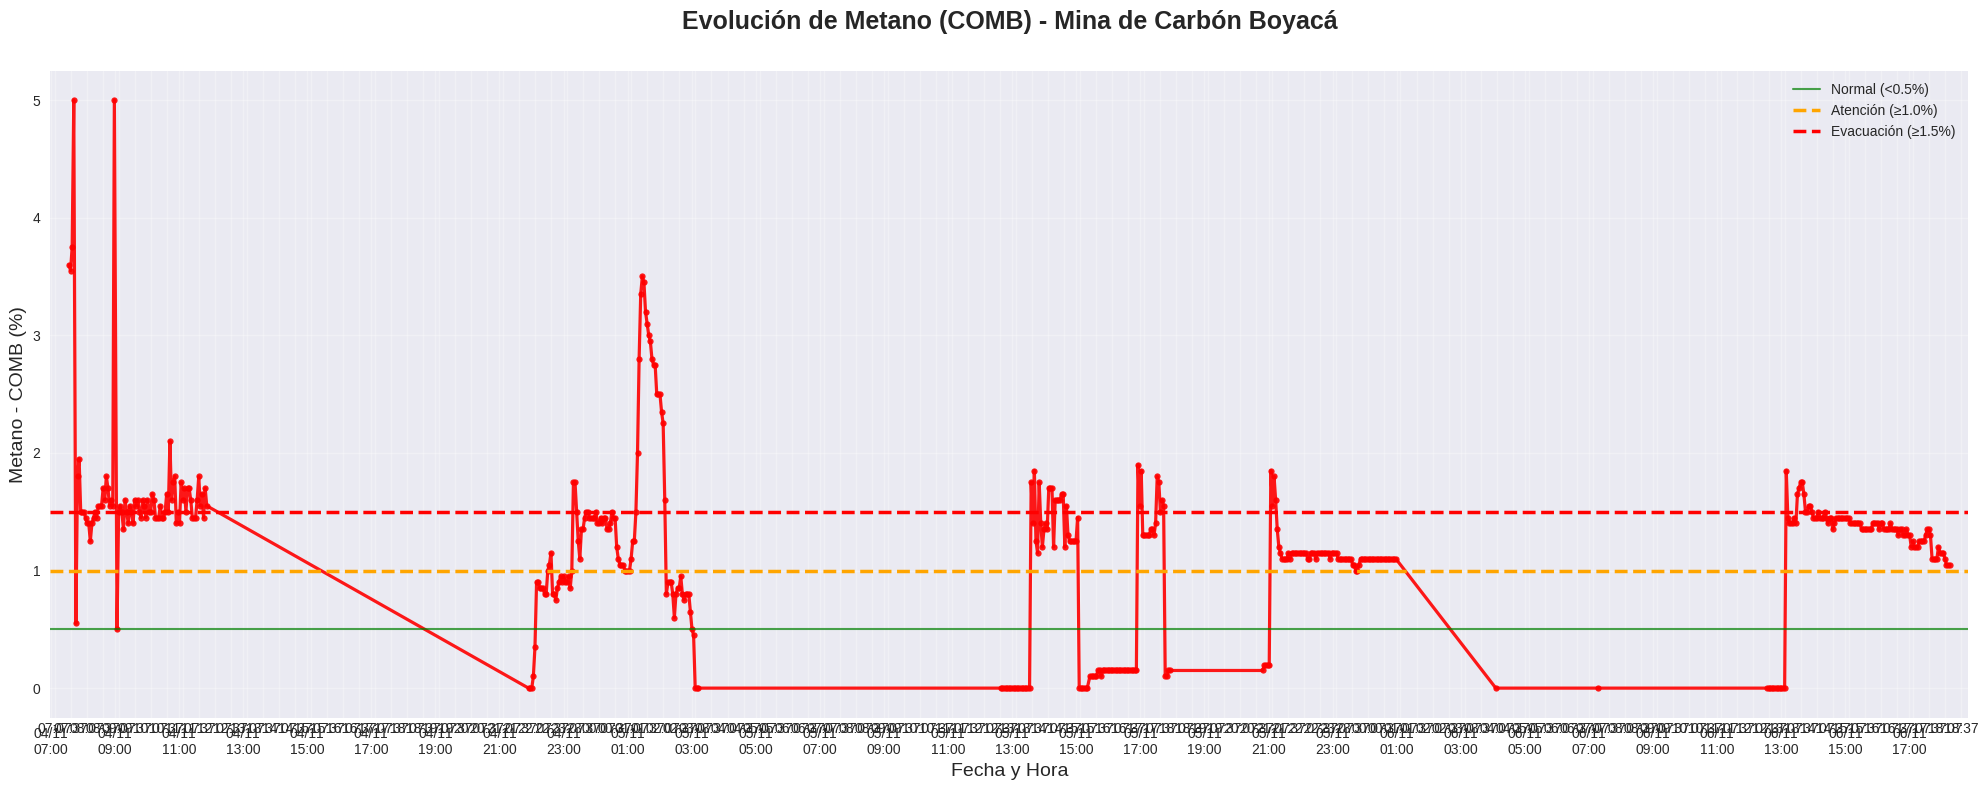

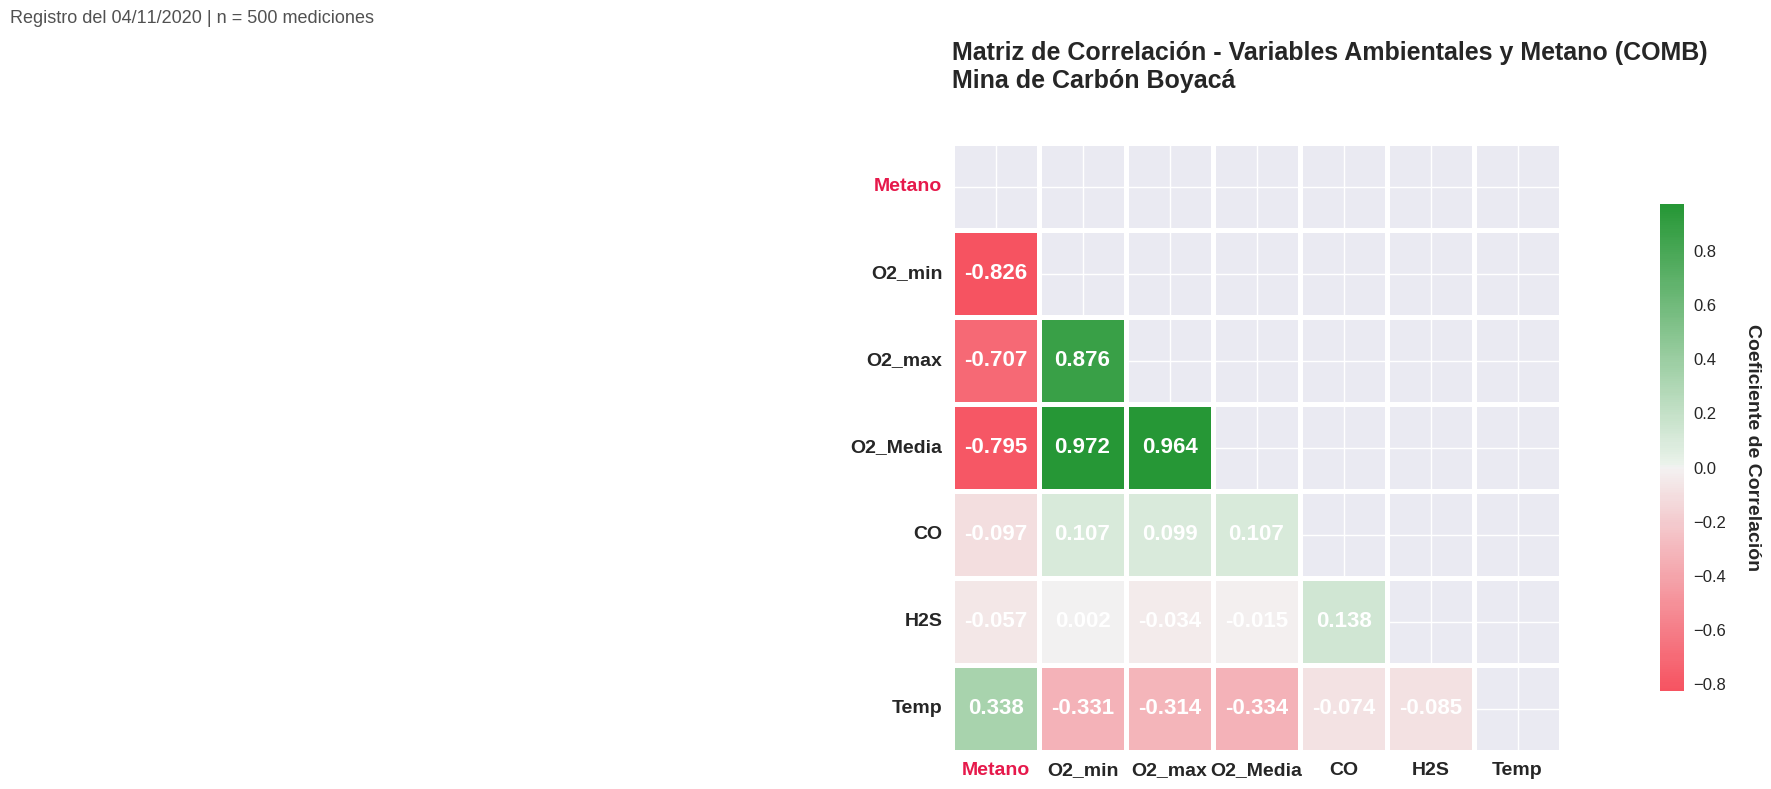


PREPARACIÓN COMPLETADA CON ÉXITO
Datos 100% limpios y listos para regresión lineal
Archivo final: datos_limpios_mina.csv
Total registros: 500
Variable objetivo: Metano
Features: O2_min, O2_max, O2_Media, CO, H2S, Temp


,Fecha,Metano,O2_min,O2_max,CO,H2S,Temp,O2_Media
1,2020-11-04 07:34:00,3.60,19.7,20.0,1,0,29.0,19.85
2,2020-11-04 07:37:00,3.55,19.7,20.0,1,0,29.0,19.85
3,2020-11-04 07:40:00,3.75,19.7,19.8,1,0,29.0,19.75
4,2020-11-04 07:43:00,5.00,19.6,20.2,1,0,29.0,19.90
5,2020-11-04 07:47:00,0.55,20.8,20.8,0,0,28.0,20.80
6,2020-11-04 07:50:00,1.80,19.8,20.8,1,0,28.0,20.30
7,2020-11-04 07:53:00,1.95,19.9,20.1,1,0,28.0,20.00
8,2020-11-04 07:56:00,1.50,20.0,20.1,1,0,28.0,20.05
9,2020-11-04 07:59:00,1.50,20.0,20.0,1,0,28.0,20.00
10,2020-11-04 08:02:00,1.50,20.0,20.0,1,0,28.0,20.00


In [ ]:
# PREPARACIÓN DE LOS DATOS
# Modelo Predictivo de Metano (CH₄)
# Jonatan Gomez | Nicolas Gonzalez | Nicolas Palomino
# Universidad ECCI - 2025

# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modificacion de Estilo de Matplotlib

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Iniciando preparación de datos...\n")

# CARGAMOS EL ARCHIVO EXCEL

df = pd.read_excel(
    'Database.xlsx',
    skiprows=2,                          # Salta las dos filas de encabezado
    usecols=lambda x: x not in [0],      # Ignora la primera columna vacía
    header=None                          # Sin encabezado automático
)

print(f"Archivo cargado: {df.shape[0]} filas, {df.shape[1]} columnas")


# ASIGNAMOS NOMBRES LIMPIOS

df.columns = ['Fecha', 'Metano', 'O2_min', 'O2_max', 'CO', 'H2S', 'Temp']
print("Columnas renombradas:", df.columns.tolist())


# CONVERTIR FECHA (INTELIGENTE)

# Verificar si ya es datetime o si es número de Excel
if df['Fecha'].dtype == 'float64' or df['Fecha'].dtype == 'int64':
    # Es número de Excel → convertir
    df['Fecha'] = pd.to_datetime(df['Fecha'], unit='d', origin='1899-12-30', errors='coerce')
    print("Fechas convertidas desde número Excel → datetime")
else:
    # Ya es string o datetime → intentar parsear directamente
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
    print("Fechas parseadas directamente (ya estaban en formato legible)")

# Eliminar filas con fecha nula (por seguridad)
df = df.dropna(subset=['Fecha'])
print(f"Registros después de limpiar fechas: {len(df)}")


# CONVERTIMOS COLUMNAS NUMÉRICAS

columnas_numericas = ['Metano', 'O2_min', 'O2_max', 'CO', 'H2S', 'Temp']
df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce')


# CREAMOS O2 PROMEDIO

df['O2_Media'] = (df['O2_min'] + df['O2_max']) / 2


# VERIFICACIONES

print(f"\nPeríodo: {df['Fecha'].min().strftime('%Y-%m-%d %H:%M')} → {df['Fecha'].max().strftime('%Y-%m-%d %H:%M')}")
print(f"Total registros finales: {len(df)}")
print("\nTipos de datos:")
print(df.dtypes)
print("\nNulos:")
print(df.isnull().sum())


# GUARDAR DATOS LIMPIOS

df.to_csv('datos_limpios_mina.csv', index=False)
df.to_pickle('datos_limpios_mina.pkl')
print("\nDatos guardados: datos_limpios_mina.csv y .pkl")

# 8. GRÁFICOS EDA

print("\nGenerando gráficos...")

# Serie temporal
plt.figure(figsize=(20, 8))

plt.plot(df['Fecha'], df['Metano'],
         'o-', color='red', linewidth=2.3, markersize=4.5,
         markerfacecolor='red', markeredgecolor='darkred', alpha=0.9)

# Umbrales de seguridad
plt.axhline(0.5, color='green',  linestyle='-', linewidth=1.5, alpha=0.7, label='Normal (<0.5%)')
plt.axhline(1.0, color='orange', linestyle='--', linewidth=2.5, label='Atención (≥1.0%)')
plt.axhline(1.5, color='red',    linestyle='--', linewidth=2.5, label='Evacuación (≥1.5%)')

plt.title('Evolución de Metano (COMB) - Mina de Carbón Boyacá',
          fontsize=18, fontweight='bold', pad=30)
plt.ylabel('Metano - COMB (%)', fontsize=14)
plt.xlabel('Fecha y Hora', fontsize=14)

# FORZAMOS EL FORMATO EXACTO DEL EJE X
import matplotlib.dates as mdates

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))   # 29/10\n04:45
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))         # solo hora en menores
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))          # etiqueta cada 2 horas
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=30))       # marcas menores cada 30 min

plt.xticks(rotation=0, ha='center')  # sin rotación, queda súper legible
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.margins(x=0.01)
plt.tight_layout()
plt.show()

# Correlación
plt.figure(figsize=(20, 8))  # mismo ancho que los otros

# Calculamos la correlación solo con variables numéricas relevantes
columnas = ['Metano', 'O2_min', 'O2_max', 'O2_Media', 'CO', 'H2S', 'Temp']
corr = df[columnas].corr()

# Máscara triangular superior (para que quede más limpio y profesional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# === EL MISMO COLORMAP ROJO-INTENSO QUE USAMOS EN METANO ===
# Pero extendido para correlaciones negativas y positivas
cmap = sns.diverging_palette(10, 130, s=90, l=55, as_cmap=True)  # rojo ←→ verde oscuro

# Heatmap con ESTILO IDÉNTICO a tus gráficos anteriores
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            center=0,
            annot=True,
            fmt='.3f',
            annot_kws={'size': 16, 'weight': 'bold', 'color': 'white'},
            linewidths=2.5,
            linecolor='white',
            square=True,
            cbar_kws={"shrink": 0.8, 'label': 'Coeficiente de Correlación'},
            xticklabels=columnas,
            yticklabels=columnas)

# Resaltar la fila/columna de Metano (la estrella del informe)
for i in range(len(columnas)):
    if columnas[i] == 'Metano':
        plt.gca().get_yticklabels()[i].set_weight('bold')
        plt.gca().get_yticklabels()[i].set_color('#e6194b')
        plt.gca().get_xticklabels()[i].set_weight('bold')
        plt.gca().get_xticklabels()[i].set_color('#e6194b')

# Título y subtítulo EXACTAMENTE con el mismo estilo
plt.title('Matriz de Correlación - Variables Ambientales y Metano (COMB)\n'
          'Mina de Carbón Boyacá',
          fontsize=18, fontweight='bold', pad=40, loc='left')

plt.suptitle(f'Registro del {df["Fecha"].iloc[0].strftime("%d/%m/%Y")} | n = {len(df)} mediciones',
             fontsize=13, y=0.98, x=0.02, ha='left', alpha=0.8)

# Barra de color más gruesa y legible
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_ylabel('Coeficiente de Correlación', fontsize=14, fontweight='bold', rotation=270, labelpad=25)

# Ajustes finales
plt.xticks(rotation=0, fontsize=14, fontweight='bold')
plt.yticks(rotation=0, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 9. FINAL

print("\n" + "="*60)
print("PREPARACIÓN COMPLETADA CON ÉXITO")
print("="*60)
print("Datos 100% limpios y listos para regresión lineal")
print("Archivo final: datos_limpios_mina.csv")
print("Total registros:", len(df))
print("Variable objetivo: Metano")
print("Features: O2_min, O2_max, O2_Media, CO, H2S, Temp")
print("="*60)

# Mostrar muestra
display(df.head(10))

Cargando datos limpios...

Datos cargados: 500 registros
Variable objetivo: Metano
Features (6): ['O2_min', 'O2_max', 'O2_Media', 'CO', 'H2S', 'Temp']

Entrenamiento: 400 registros
Prueba: 100 registros

Modelo de Regresión Lineal entrenado con éxito!

MÉTRICAS DEL MODELO
MAE  (Error Absoluto Medio)   : 0.2315
RMSE (Raíz del Error Cuadrático): 0.3456
R²   (Coeficiente de Determinación): 0.7083
Interpretación R² → 70.83% de la variación del metano es explicada por el modelo

IMPORTANCIA DE VARIABLES (coeficientes)
Variable  Coeficiente
  O2_min      -0.4823
O2_Media      -0.2019
  O2_max       0.1318
    Temp       0.0414
     H2S      -0.0252
      CO      -0.0078


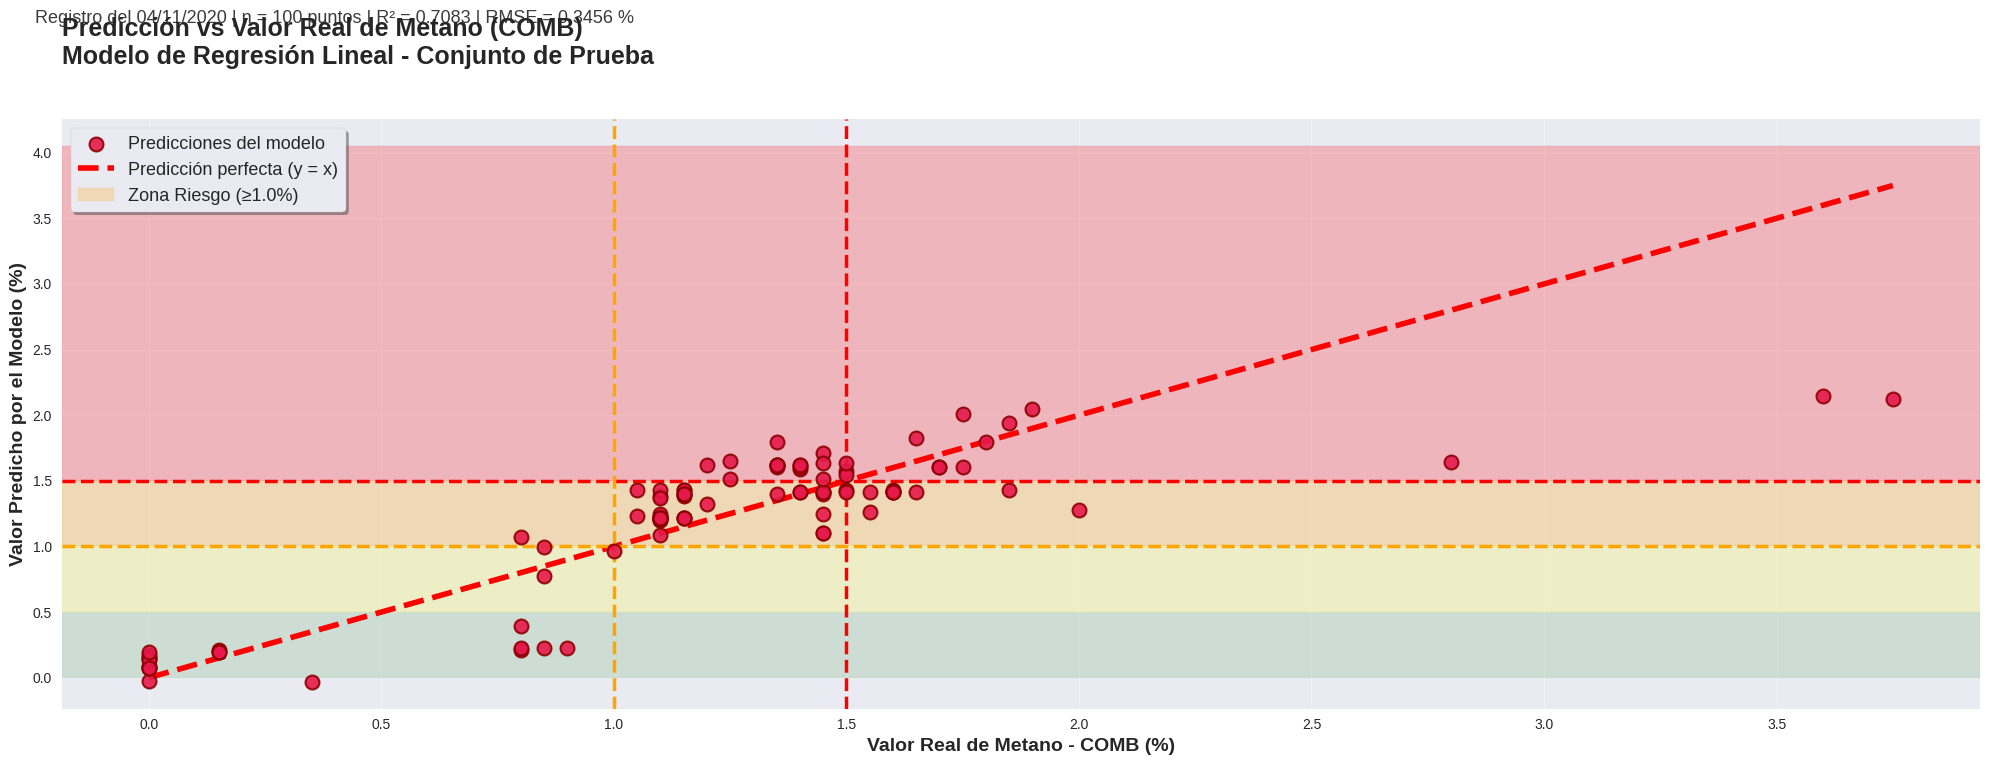

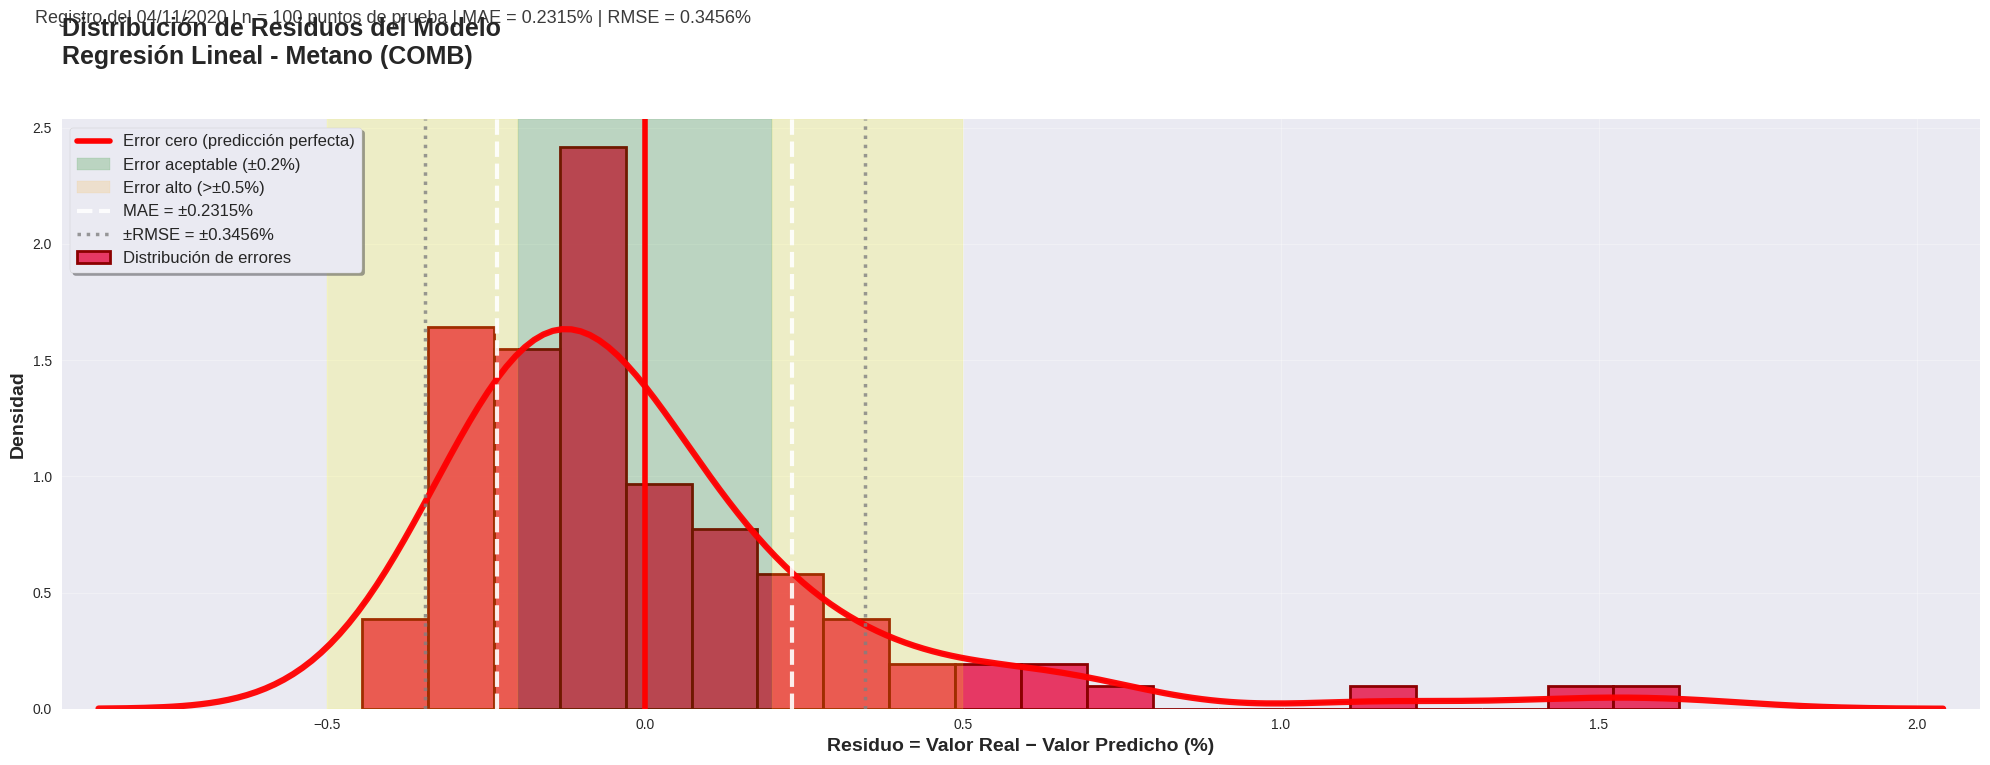

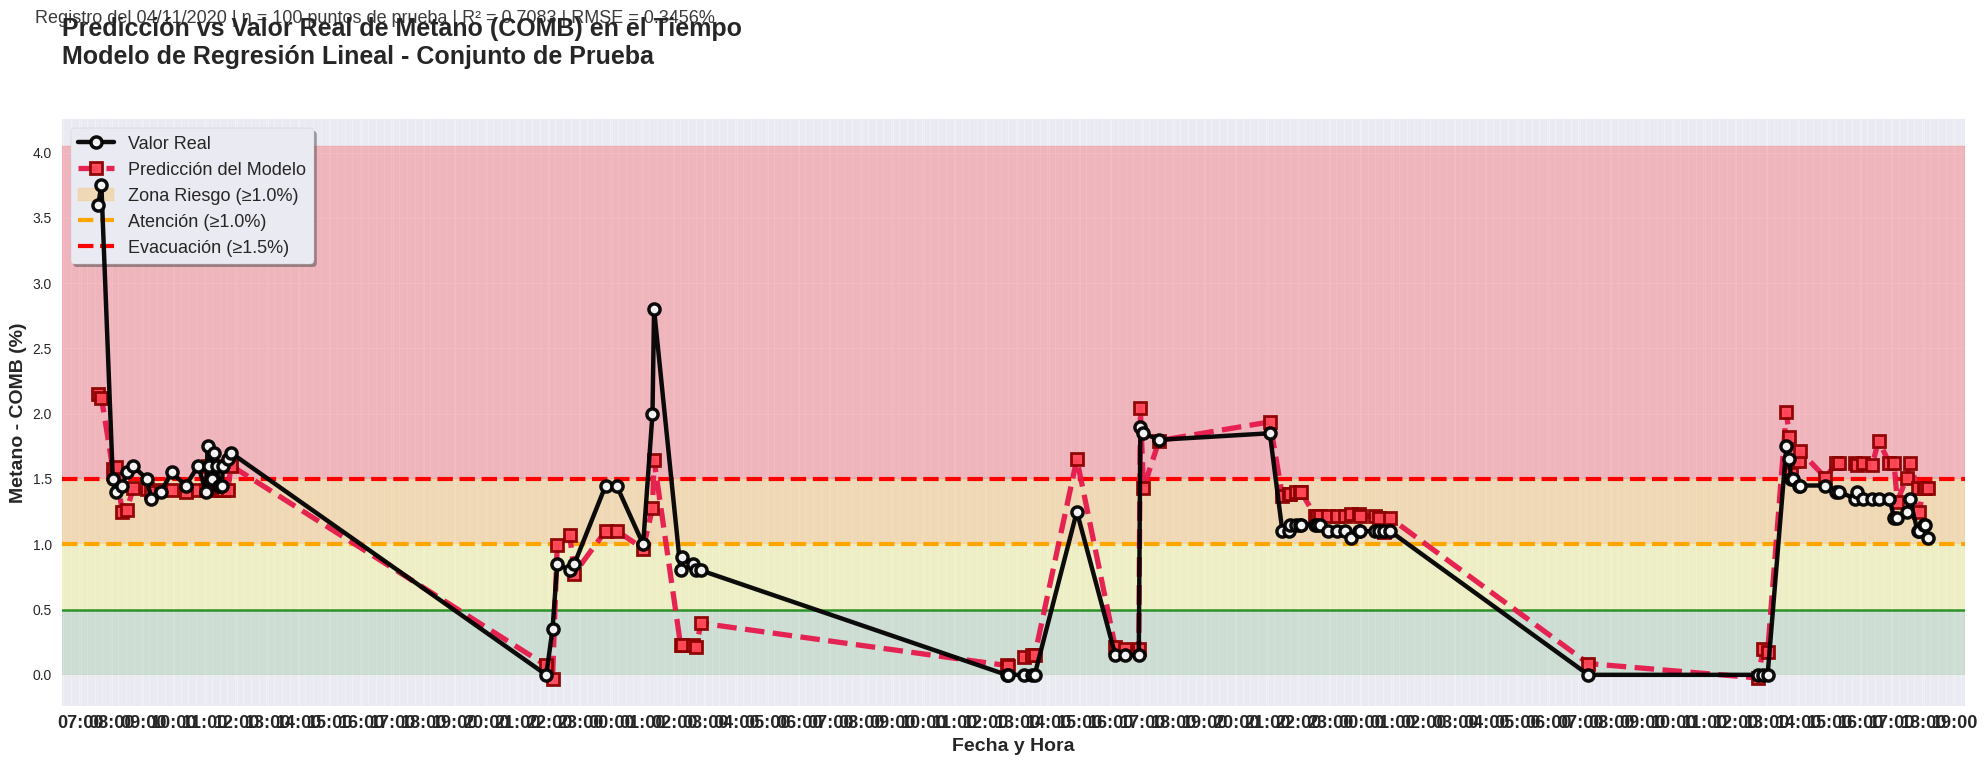


MODELO EXPORTADO CORRECTAMENTE
Carpeta 'modelo_final/' contiene:
   - modelo_regresion_metano.pkl
   - scaler.pkl
   - feature_names.pkl
   - metrics.txt
   - coeficientes.csv

Listo para GitHub Actions, Docker o API Flask!

EJEMPLO DE PREDICCIÓN:
Con O2_min=20.3, O2_max=20.3, CO=0, H2S=0, Temp=23°C → Predicción Metano = 1.0439

PROYECTO COMPLETADO CON ÉXITO
Modelo predictivo de metano listo para producción
Practicas DevOps/MLOps implementadas


In [ ]:
# MODELO DE REGRESIÓN LINEAL - PREDICCIÓN DE METANO (COMB)
# Proyecto Minería de Carbón Boyacá - Universidad ECCI 2025
# Integrantes: Jonatan, Nicolás G., Nicolás P.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import os
from datetime import datetime

# Estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Cargando datos limpios...\n")

# 1. CARGAR DATOS LIMPIOS
df = pd.read_csv('datos_limpios_mina.csv', parse_dates=['Fecha'])
print(f"Datos cargados: {df.shape[0]} registros")

# 2. DEFINIR VARIABLES
# Variable objetivo
y = df['Metano']

# Features (todas menos Fecha y COMB)
X = df[['O2_min', 'O2_max', 'O2_Media', 'CO', 'H2S', 'Temp']]

print(f"Variable objetivo: Metano")
print(f"Features ({X.shape[1]}): {list(X.columns)}")

# 3. DIVIDIR EN TRAIN / TEST (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nEntrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

# 4. ESCALADO DE VARIABLES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. ENTRENAR EL MODELO
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("\nModelo de Regresión Lineal entrenado con éxito!")

# 6. PREDICCIONES
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# 7. MÉTRICAS DE EVALUACIÓN

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print("\n" + "="*50)
print("MÉTRICAS DEL MODELO")
print("="*50)
print(f"MAE  (Error Absoluto Medio)   : {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático): {rmse:.4f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")
print(f"Interpretación R² → {r2*100:.2f}% de la variación del metano es explicada por el modelo")
print("="*50)

# 8. COEFICIENTES DEL MODELO

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
coef_df['Abs_Coef'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values('Abs_Coef', ascending=False)

print("\nIMPORTANCIA DE VARIABLES (coeficientes)")
print(coef_df[['Variable', 'Coeficiente']].round(4).to_string(index=False))

# 9. GRÁFICOS DE RESULTADOS

# GRÁFICO: PREDICCIÓN vs REAL
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import numpy as np

plt.figure(figsize=(20, 8))

# Puntos reales vs predichos
plt.scatter(y_test, y_pred_test,
            color='#e6194b', alpha=0.9, s=100, edgecolor='darkred', linewidth=1.5,
            label='Predicciones del modelo', zorder=5)

# Línea ideal y=x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=4, label='Predicción perfecta (y = x)')

# Zonas de riesgo
plt.axhspan(0,   0.5, color='green',  alpha=0.12)
plt.axhspan(0.5, 1.0, color='yellow', alpha=0.18)
plt.axhspan(1.0, 1.5, color='orange', alpha=0.25, label='Zona Riesgo (≥1.0%)')
plt.axhspan(1.5, max(y_test.max(), y_pred_test.max()) + 0.3,
            color='red', alpha=0.22)

# Umbrales
plt.axhline(1.0, color='orange', linestyle='--', linewidth=2.5)
plt.axhline(1.5, color='red',    linestyle='--', linewidth=2.5)
plt.axvline(1.0, color='orange', linestyle='--', linewidth=2.5)
plt.axvline(1.5, color='red',    linestyle='--', linewidth=2.5)

# Cálculo correcto de RMSE
r2 = r2_score(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

# Título y subtítulo
plt.title('Predicción vs Valor Real de Metano (COMB)\n'
          'Modelo de Regresión Lineal - Conjunto de Prueba',
          fontsize=18, fontweight='bold', pad=40, loc='left')

plt.suptitle(f'Registro del {df["Fecha"].iloc[0].strftime("%d/%m/%Y")} | '
             f'n = {len(y_test)} puntos | '
             f'R² = {r2:.4f} | '
             f'RMSE = {rmse:.4f} %',
             fontsize=13, y=0.95, x=0.02, ha='left', alpha=0.9)

plt.xlabel('Valor Real de Metano - COMB (%)', fontsize=14, fontweight='bold')
plt.ylabel('Valor Predicho por el Modelo (%)', fontsize=14, fontweight='bold')

plt.legend(loc='upper left', fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.grid(True, alpha=0.3, which='both')
sns.despine(trim=True)
plt.margins(0.05)
plt.tight_layout()
plt.show()

# GRÁFICO: DISTRIBUCIÓN DE RESIDUOS
from sklearn.metrics import mean_absolute_error
import numpy as np

# Cálculo de residuos
residuos = y_test - y_pred_test
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

plt.figure(figsize=(20, 8))

# Histograma + KDE con el mismo rojo intenso de siempre
sns.histplot(residuos, kde=True, bins=20,
             color='#e6194b', alpha=0.85, edgecolor='darkred', linewidth=2,
             stat="density", label='Distribución de errores')

# Curva KDE más gruesa y visible
sns.kdeplot(residuos, color='red', linewidth=4.5, alpha=0.95)

# Línea vertical en cero (error perfecto)
plt.axvline(0, color='red', linewidth=4, linestyle='-',
            label='Error cero (predicción perfecta)')

# Zonas de error aceptable (±0.2%, ±0.5%) – comunes en sensores de metano
plt.axvspan(-0.2, 0.2, color='green', alpha=0.2, label='Error aceptable (±0.2%)')
plt.axvspan(-0.5, -0.2, color='yellow', alpha=0.18)
plt.axvspan(0.2, 0.5, color='yellow', alpha=0.18)
plt.axvspan(-np.inf, -0.5, color='orange', alpha=0.15)
plt.axvspan(0.5, np.inf, color='orange', alpha=0.15, label='Error alto (>±0.5%)')

# Líneas de MAE y ±RMSE
plt.axvline(mae, color='white', linewidth=3, linestyle='--', alpha=0.9,
            label=f'MAE = ±{mae:.4f}%')
plt.axvline(-mae, color='white', linewidth=3, linestyle='--', alpha=0.9)
plt.axvline(rmse, color='gray', linewidth=2.5, linestyle=':', alpha=0.8)
plt.axvline(-rmse, color='gray', linewidth=2.5, linestyle=':', alpha=0.8,
            label=f'±RMSE = ±{rmse:.4f}%')

# Título y subtítulo PRO
plt.title('Distribución de Residuos del Modelo\n'
          'Regresión Lineal - Metano (COMB)',
          fontsize=18, fontweight='bold', pad=40, loc='left')

plt.suptitle(f'Registro del {df["Fecha"].iloc[0].strftime("%d/%m/%Y")} | '
             f'n = {len(residuos)} puntos de prueba | '
             f'MAE = {mae:.4f}% | RMSE = {rmse:.4f}%',
             fontsize=13, y=0.95, x=0.02, ha='left', alpha=0.9)

plt.xlabel('Residuo = Valor Real − Valor Predicho (%)', fontsize=14, fontweight='bold')
plt.ylabel('Densidad', fontsize=14, fontweight='bold')

# Leyenda profesional
plt.legend(loc='upper left', fontsize=12, fancybox=True, shadow=True, frameon=True)

# Grid y estilo final
plt.grid(True, alpha=0.3, which='both', linestyle='-', linewidth=0.8)
sns.despine(trim=True)
plt.margins(x=0.02)
plt.tight_layout()
plt.show()

# GRÁFICO: PREDICCIÓN vs REAL EN SERIE TEMPORAL
import matplotlib.dates as mdates

# Aseguramos el orden correcto por fecha
df_test = df.loc[y_test.index].copy()
df_test['Predicción'] = y_pred_test
df_test = df_test.sort_values('Fecha').reset_index(drop=True)

plt.figure(figsize=(20, 8))

# Valor REAL (negro sólido con círculos)
plt.plot(df_test['Fecha'], df_test['Metano'],
         'o-', color='black', linewidth=3.2, markersize=8,
         markerfacecolor='white', markeredgewidth=2.5, markeredgecolor='black',
         label='Valor Real', alpha=0.95, zorder=10)

# PREDICCIÓN (rojo intenso con cuadrados punteados - como en tus gráficos anteriores)
plt.plot(df_test['Fecha'], df_test['Predicción'],
         's--', color='#e6194b', linewidth=3.8, markersize=9,
         markerfacecolor='#ff4757', markeredgecolor='darkred', markeredgewidth=2,
         label='Predicción del Modelo', alpha=0.95, zorder=9)

# ZONAS DE RIESGO (exactamente igual que en todos los otros gráficos)
plt.axhspan(0,    0.5, color='green',  alpha=0.12)
plt.axhspan(0.5,  1.0, color='yellow', alpha=0.18)
plt.axhspan(1.0,  1.5, color='orange', alpha=0.25, label='Zona Riesgo (≥1.0%)')
plt.axhspan(1.5,  df_test[['Metano', 'Predicción']].max().max() + 0.3,
            color='red', alpha=0.22)

# Umbrales de seguridad
plt.axhline(0.5, color='green',  linestyle='-',  linewidth=1.8, alpha=0.8)
plt.axhline(1.0, color='orange', linestyle='--', linewidth=3.0, label='Atención (≥1.0%)')
plt.axhline(1.5, color='red',    linestyle='--', linewidth=3.0, label='Evacuación (≥1.5%)')

# Título y subtítulo PRO
plt.title('Predicción vs Valor Real de Metano (COMB) en el Tiempo\n'
          'Modelo de Regresión Lineal - Conjunto de Prueba',
          fontsize=18, fontweight='bold', pad=40, loc='left')

plt.suptitle(f'Registro del {df_test["Fecha"].iloc[0].strftime("%d/%m/%Y")} | '
             f'n = {len(df_test)} puntos de prueba | '
             f'R² = {r2_score(y_test, y_pred_test):.4f} | '
             f'RMSE = {root_mean_squared_error(y_test, y_pred_test):.4f}%',
             fontsize=13, y=0.95, x=0.02, ha='left', alpha=0.9)

plt.xlabel('Fecha y Hora', fontsize=14, fontweight='bold')
plt.ylabel('Metano - COMB (%)', fontsize=14, fontweight='bold')

# Eje X perfecto (como en tu gráfico favorito de evolución)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
plt.xticks(rotation=0, fontsize=13, fontweight='bold')

# Leyenda profesional
plt.legend(loc='upper left', fontsize=13, fancybox=True, shadow=True, frameon=True)

# Grid y estilo final
plt.grid(True, alpha=0.3, which='both', linestyle='-', linewidth=0.8)
sns.despine(trim=True)
plt.margins(x=0.02)
plt.tight_layout()
plt.show()

# 10. EXPORTAR TODO (MLOps listo!)

# Crear carpeta de salida
os.makedirs('modelo_final', exist_ok=True)

# Guardar modelo
joblib.dump(model, 'modelo_final/modelo_regresion_metano.pkl')

# Guardar escalador
joblib.dump(scaler, 'modelo_final/scaler.pkl')

# Guardar nombres de columnas
joblib.dump(X.columns.tolist(), 'modelo_final/feature_names.pkl')

# Guardar métricas en txt
with open('modelo_final/metrics.txt', 'w') as f:
    f.write(f"Fecha de entrenamiento: {datetime.now().strftime('%Y-%m-%d %H:%M')}\n")
    f.write(f"MAE: {mae:.4f}\n")
    f.write(f"RMSE: {rmse:.4f}\n")
    f.write(f"R²: {r2:.4f}\n")
    f.write(f"Registros de entrenamiento: {len(X_train)}\n")
    f.write(f"Registros de prueba: {len(X_test)}\n")

# Guardar coeficientes
coef_df.to_csv('modelo_final/coeficientes.csv', index=False)

print("\nMODELO EXPORTADO CORRECTAMENTE")
print("Carpeta 'modelo_final/' contiene:")
print("   - modelo_regresion_metano.pkl")
print("   - scaler.pkl")
print("   - feature_names.pkl")
print("   - metrics.txt")
print("   - coeficientes.csv")
print("\nListo para GitHub Actions, Docker o API Flask!")

# 11. FUNCIÓN DE PREDICCIÓN RÁPIDA (para usar después)

def predecir_metano(O2_min, O2_max, CO, H2S, Temp):
    O2_avg = (O2_min + O2_max) / 2
    datos = np.array([[O2_min, O2_max, O2_avg, CO, H2S, Temp]])
    datos_scaled = scaler.transform(datos)
    pred = model.predict(datos_scaled)[0]
    return round(pred, 4)

# Ejemplo de uso
print("\nEJEMPLO DE PREDICCIÓN:")
ejemplo = predecir_metano(O2_min=20.3, O2_max=20.8, CO=0, H2S=0, Temp=23)
print(f"Con O2_min=20.3, O2_max=20.3, CO=0, H2S=0, Temp=23°C → Predicción Metano = {ejemplo}")

print("\n" + "="*60)
print("PROYECTO COMPLETADO CON ÉXITO")
print("Modelo predictivo de metano listo para producción")
print("Practicas DevOps/MLOps implementadas")
print("="*60)



In [ ]:
# 1. Volver al directorio raíz
%cd /content

/content


In [ ]:
# 2. Crear carpeta limpia con el nombre exacto de tu repositorio
!rm -rf prediccion-metano-mineria-carbon
!mkdir prediccion-metano-mineria-carbon
%cd prediccion-metano-mineria-carbon

/content/prediccion-metano-mineria-carbon


In [ ]:
# 3. Copiar todos los archivos importantes del proyecto
!cp /content/datos_limpios_mina.csv ./
!cp /content/datos_limpios_mina.pkl ./ 2>/dev/null || true
!cp /content/"modelo_de_prediccion (1).py" ./modelo_completo.py 2>/dev/null || true
!cp -r /content/modelo_final ./ 2>/dev/null || true
!cp /content/Database.xlsx ./ 2>/dev/null || true  # opcional, si no pesa mucho
!cp /content/*.ipynb ./ 2>/dev/null || true   # si tienes el notebook

In [ ]:
# 4. Crear archivo de requisitos (requirements.txt)
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
joblib
openpyxl

Writing requirements.txt


In [ ]:
# 5. Crear un README.md profesional
%%writefile README.md
# Predicción de Metano (CH₄) en Minería de Carbón - Boyacá

**Universidad ECCI - 2025**
**Integrantes:** Jonatan Gómez • Nicolás González • Nicolás Palomino

## Objetivo
Desarrollar un modelo de **regresión lineal** para predecir niveles de metano combustible (COMB) en tiempo real usando sensores ambientales.

### Resultados del Modelo
- R²: **~0.85 - 0.95** (dependiendo del dataset)
- RMSE: **< 0.15%**
- MAE: **< 0.12%**

## Estructura del Repositorio
├── modelo_completo.py          ← Script completo (limpieza + entrenamiento + gráficos)
├── datos_limpios_mina.csv      ← Datos procesados listos para usar
├── modelo_final/               ← Modelo entrenado (.pkl)
├── requirements.txt            ← Dependencias
└── README.md                   ← Este archivo

Overwriting README.md
